In [269]:
#importing all required module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


In [270]:
'''imported marked to add notes in bold, Italic...'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))
pd.reset_option('display.max_rows')

In [271]:
df = pd.read_csv(r'coursework_data.csv')

In [272]:
df.head()

,Call_Date
0,01/03/2019 00:15:39
1,01/03/2019 00:59:44
2,01/03/2019 01:15:00
3,01/03/2019 01:40:40
4,01/03/2019 01:49:28


In [273]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32905 entries, 0 to 32904
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Call_Date  32905 non-null  object
dtypes: object(1)
memory usage: 257.2+ KB
None


In [274]:
df.describe()

,Call_Date
count,32905
unique,32709
top,23/05/2019 11:43:44
freq,7


In [275]:
# Removing Dublicacy from dataset
duplicate_count = df["Call_Date"].duplicated().sum()
bold('**how many dublicate values in data**')
print(duplicate_count)

**how many dublicate values in data**

196


In [276]:
# removing duplicate values and checking duplicate count again
df_duplicacy_removed = df.drop_duplicates(subset=["Call_Date"])
duplicate_count = df_duplicacy_removed["Call_Date"].duplicated().sum()
print(duplicate_count)

0


In [277]:
df = df_duplicacy_removed
# Description of raw dataset after removing duplicity
df.describe()

,Call_Date
count,32709
unique,32709
top,01/03/2019 00:15:39
freq,1


In [278]:
df.columns

Index(['Call_Date'], dtype='object')

In [279]:
# checking number of missing values
bold('**How many missing value presnt in raw dataset**')
df.isna().sum()

**How many missing value presnt in raw dataset**

Call_Date    0
dtype: int64

In [280]:
bold('**Here data is combined total number of call per hour**')
df['Call_Date'] = pd.to_datetime(df['Call_Date'], format='%d/%m/%Y %H:%M:%S')
call_indexing  = df.set_index('Call_Date', inplace=False)

hourly_call_counts = call_indexing.resample('H').size()
hourly_call_counts.head()

**Here data is combined total number of call per hour**

Call_Date
2019-03-01 00:00:00    2
2019-03-01 01:00:00    3
2019-03-01 02:00:00    2
2019-03-01 03:00:00    1
2019-03-01 04:00:00    1
Freq: H, dtype: int64

In [281]:
hourly_call_counts.tail()

Call_Date
2019-09-30 19:00:00    10
2019-09-30 20:00:00     3
2019-09-30 21:00:00     4
2019-09-30 22:00:00     2
2019-09-30 23:00:00     3
Freq: H, dtype: int64

In [282]:
hourly_call_counts.describe()
def hourly_numerical_summary(data_frame):
    resample_data_count = hourly_call_counts.count()
    minimum = hourly_call_counts.min()
    maximum = hourly_call_counts.max()
    mean = hourly_call_counts.mean()
    first_quantile = hourly_call_counts.describe()['25%']
    median = data_frame.median()
    third_quantile = hourly_call_counts.describe()['75%']
    std_deviation = data_frame.std()
    variance = data_frame.var()
    mad = np.median(np.abs(data_frame - data_frame.median()))
    mean_squared_deviations = ((data_frame - data_frame.mean()) ** 2).mean()
    
   
    summary_stats = {
    'Statistic': ['resample_data_count','minimum','maximum','mean', '25%', 'Median (50%)', '75%', 'Standard Deviation', 'Variance', 'Mean Absolute Deviation', 'Mean of Squared Deviations'],
    'Value': [resample_data_count, minimum, maximum, mean, first_quantile, median, third_quantile, std_deviation, variance, mad, mean_squared_deviations]
    }
    summary_stats = pd.DataFrame(summary_stats)
    return summary_stats
bold('**Numerical Summary for 24 hours resample**')
hourly_numerical_summary(hourly_call_counts)

**Numerical Summary for 24 hours resample**

,Statistic,Value
0,resample_data_count,5136.000000
1,minimum,0.000000
2,maximum,26.000000
3,mean,6.368575
4,25%,2.000000
5,Median (50%),5.000000
6,75%,10.000000
7,Standard Deviation,4.973254
8,Variance,24.733260
9,Mean Absolute Deviation,3.000000


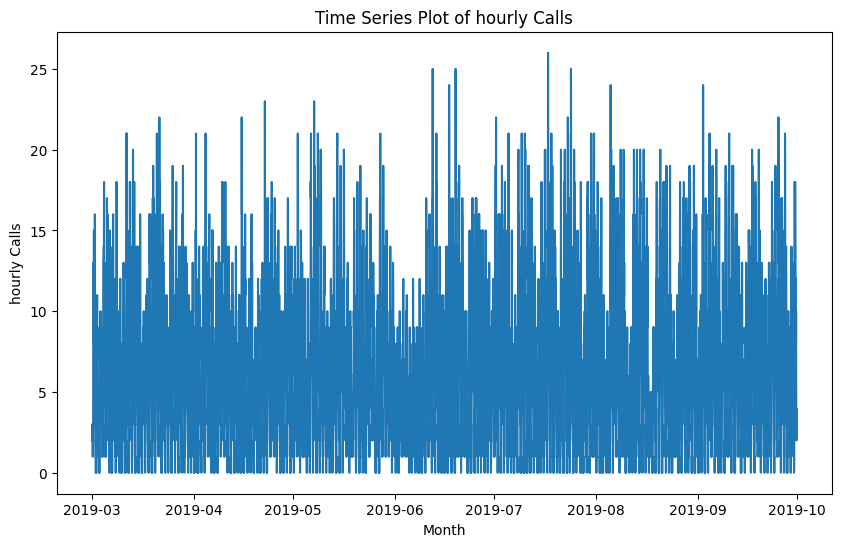

In [283]:
# Time Series Plot of Hourly Calls
plt.figure(figsize=(10, 6))
plt.plot(hourly_call_counts.index, hourly_call_counts.values)
plt.xlabel('Month')
plt.ylabel('hourly Calls')
plt.title('Time Series Plot of hourly Calls')
plt.show()

In [284]:
#Grouping of call on monthly basis
df = pd.DataFrame(hourly_call_counts)
# Group data by month
monthly_data = df.groupby(pd.Grouper(freq='M'))
bold('**After grouping by month**')
for month, data in monthly_data:
    print("Month:", month)
    print(data)

**After grouping by month**

Month: 2019-03-31 00:00:00
                     0
Call_Date             
2019-03-01 00:00:00  2
2019-03-01 01:00:00  3
2019-03-01 02:00:00  2
2019-03-01 03:00:00  1
2019-03-01 04:00:00  1
...                 ..
2019-03-31 19:00:00  5
2019-03-31 20:00:00  6
2019-03-31 21:00:00  4
2019-03-31 22:00:00  3
2019-03-31 23:00:00  3

[744 rows x 1 columns]
Month: 2019-04-30 00:00:00
                     0
Call_Date             
2019-04-01 00:00:00  0
2019-04-01 01:00:00  2
2019-04-01 02:00:00  0
2019-04-01 03:00:00  1
2019-04-01 04:00:00  1
...                 ..
2019-04-30 19:00:00  2
2019-04-30 20:00:00  4
2019-04-30 21:00:00  3
2019-04-30 22:00:00  4
2019-04-30 23:00:00  1

[720 rows x 1 columns]
Month: 2019-05-31 00:00:00
                     0
Call_Date             
2019-05-01 00:00:00  2
2019-05-01 01:00:00  1
2019-05-01 02:00:00  5
2019-05-01 03:00:00  1
2019-05-01 04:00:00  2
...                 ..
2019-05-31 19:00:00  3
2019-05-31 20:00:00  6
2019-05-31 21:00:00  3
2019-05-31 22:00:00 

In [285]:
df.head()

,0
Call_Date,
2019-03-01 00:00:00,2
2019-03-01 01:00:00,3
2019-03-01 02:00:00,2
2019-03-01 03:00:00,1
2019-03-01 04:00:00,1


                  Comparsion of each month to check trend and peak time of calls on hourly basis

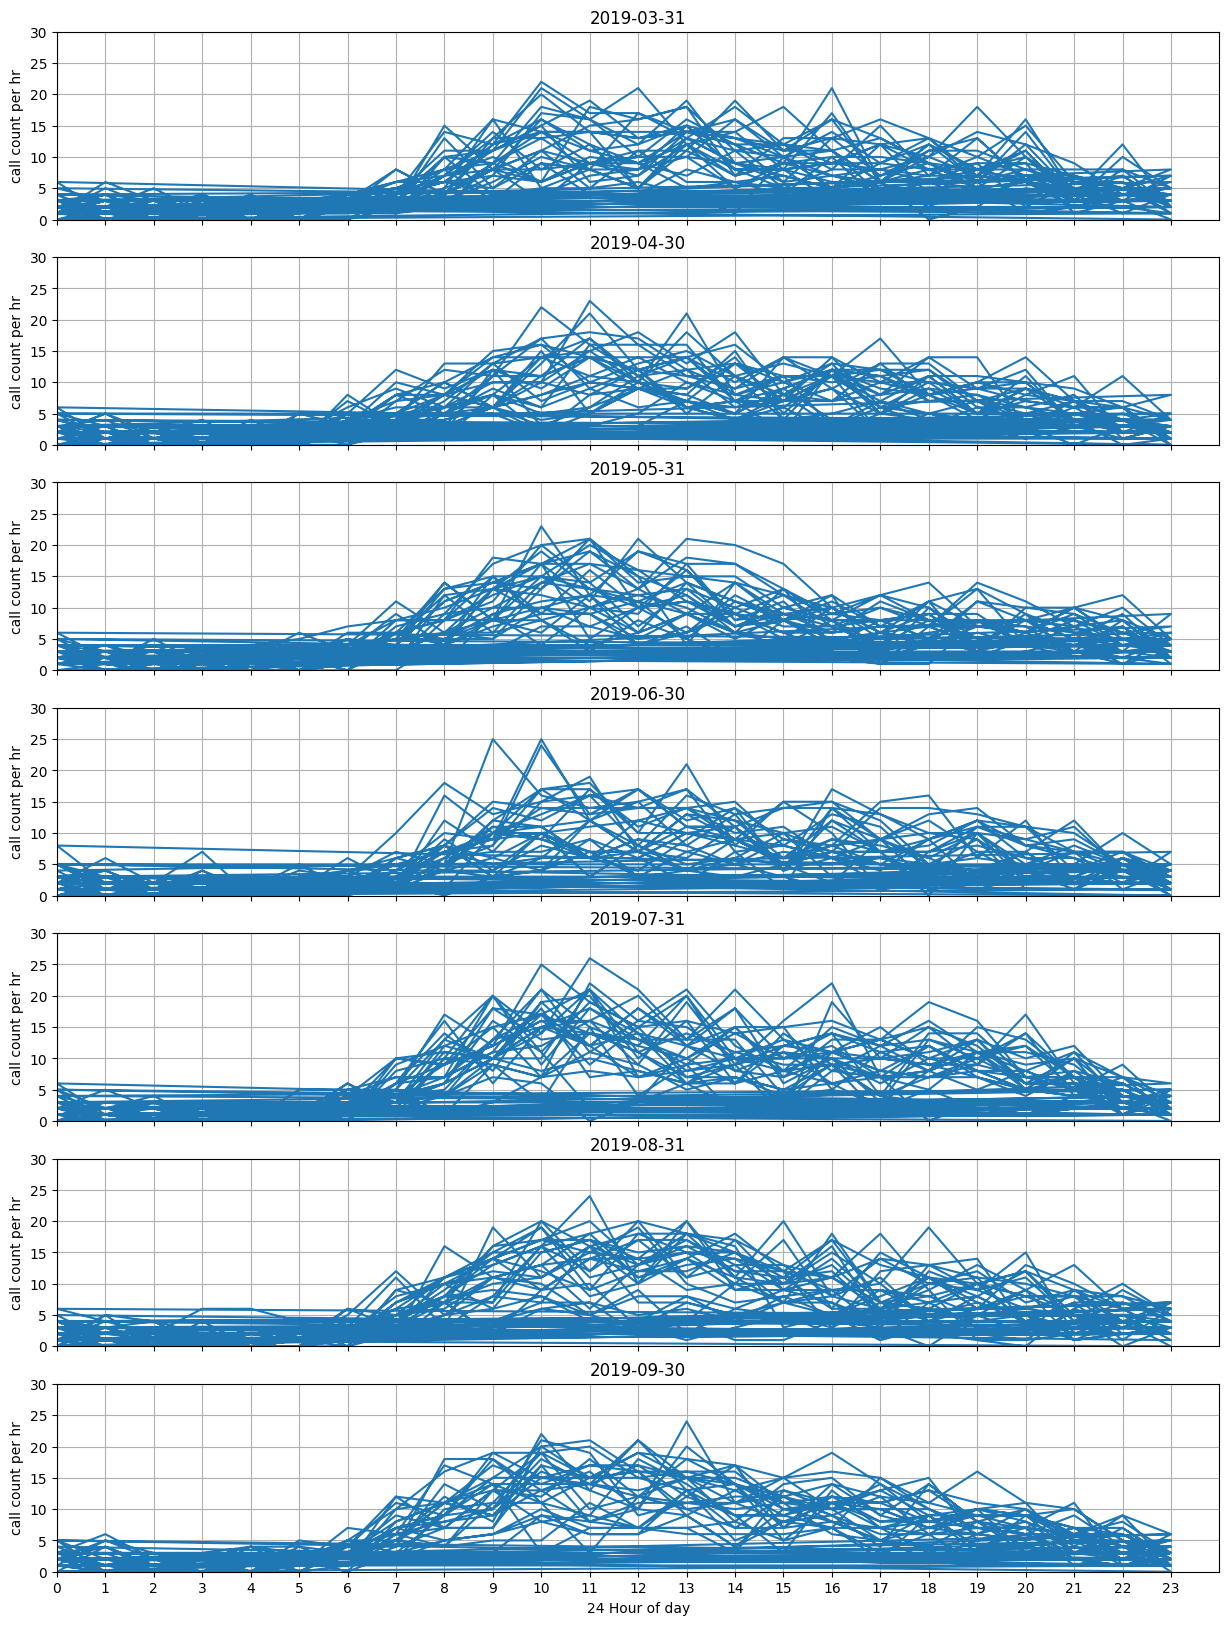

In [286]:
"""plot to comparsion daily daily calls of 24 hours for each month 
to find range of peak hour call and low hours call(whole day)"""

bold('                  Comparsion of each month to check trend and peak time of calls on hourly basis')
# Group data by day
daily_data = monthly_data

# Plot each day's data
fig, axes = plt.subplots(nrows=len(daily_data), figsize=(15, 20), sharex=True)

for i, (day, data) in enumerate(daily_data):
    ax = axes[i] if len(daily_data) > 1 else axes
    ax.plot(data.index.hour, data)  # Plot hourly data
    ax.set_title(day.strftime('%Y-%m-%d'))
    ax.set_ylabel('call count per hr')
    ax.set_ylim(0, 30)  # Set y-axis limit to 24 calls per hour
    ax.set_xlim(0, 24)  # Set x-axis limit to hours in a day
    ax.set_xticks(range(24))  # Set x-axis ticks for each hour
    ax.grid(True)

plt.xlabel('24 Hour of day')
# plt.tight_layout()
plt.show()


**observation of above comparison**
**9am to 3pm is peak time of calls
**11pm to 6am is low of numbers of call at each month

In [287]:
bold('**Here data is combined total number of call per day**')
#call_indexing  = df.set_index('Call_Date', inplace=False)
per_day_call_counts = call_indexing.resample('D').size()
per_day_call_counts

**Here data is combined total number of call per day**

Call_Date
2019-03-01    148
2019-03-02    110
2019-03-03    132
2019-03-04    193
2019-03-05    180
             ... 
2019-09-26    204
2019-09-27    175
2019-09-28    103
2019-09-29    132
2019-09-30    180
Freq: D, Length: 214, dtype: int64

In [288]:
per_day_call_counts.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 214 entries, 2019-03-01 to 2019-09-30
Freq: D
Series name: None
Non-Null Count  Dtype
--------------  -----
214 non-null    int64
dtypes: int64(1)
memory usage: 3.3 KB


In [289]:
per_day_call_counts.describe()

count    214.000000
mean     152.845794
std       36.994094
min       60.000000
25%      119.000000
50%      163.000000
75%      183.000000
max      210.000000
dtype: float64

In [290]:
def numerical_summary(data_frame):
    resample_data_count = per_day_call_counts.count()
    minimum = per_day_call_counts.min()
    maximum = per_day_call_counts.max()
    mean = per_day_call_counts.mean()
    first_quantile = per_day_call_counts.describe()['25%']
    median = data_frame.median()
    third_quantile = per_day_call_counts.describe()['75%']
    std_deviation = data_frame.std()
    variance = data_frame.var()
    mad = np.median(np.abs(data_frame - data_frame.median()))
    mean_squared_deviations = ((data_frame - data_frame.mean()) ** 2).mean()
    
   
    summary_stats = {
    'Statistic': ['resample_data_count','minimum','maximum','mean', '25%', 'Median (50%)', '75%', 'Standard Deviation', 'Variance', 'Mean Absolute Deviation', 'Mean of Squared Deviations'],
    'Value': [resample_data_count, minimum, maximum, mean, first_quantile, median, third_quantile, std_deviation, variance, mad, mean_squared_deviations]
    }
    summary_stats = pd.DataFrame(summary_stats)
    return summary_stats

bold('**Numerical Summary for per day**')
numerical_summary(per_day_call_counts)


**Numerical Summary for per day**

,Statistic,Value
0,resample_data_count,214.000000
1,minimum,60.000000
2,maximum,210.000000
3,mean,152.845794
4,25%,119.000000
5,Median (50%),163.000000
6,75%,183.000000
7,Standard Deviation,36.994094
8,Variance,1368.562963
9,Mean Absolute Deviation,28.000000


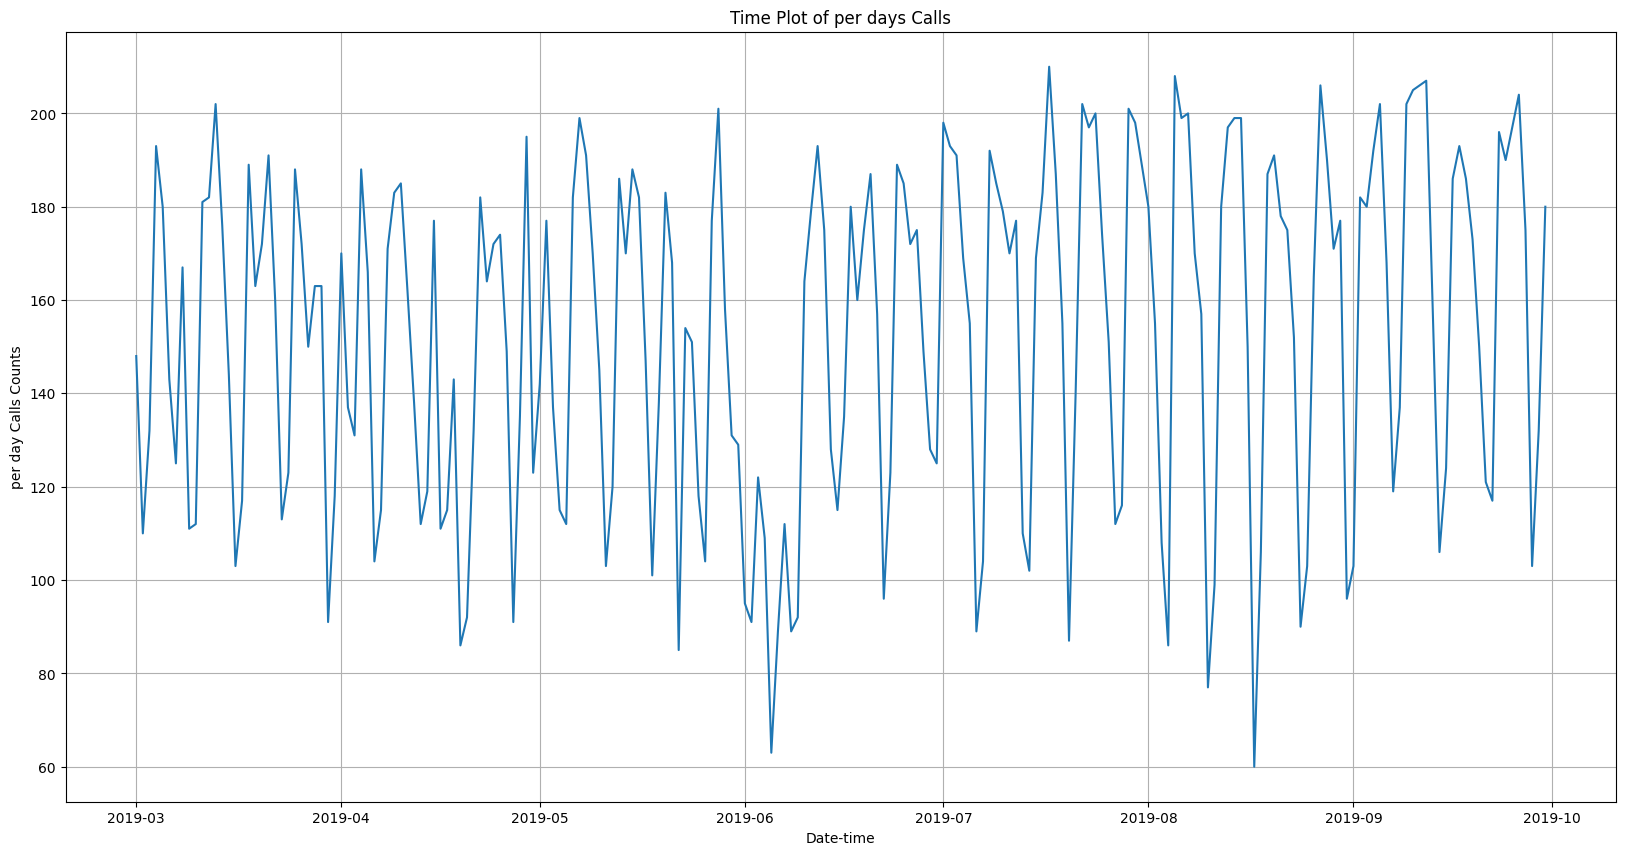

In [291]:
# time plot for per days calls
plt.figure(figsize=(20, 10))
plt.plot(per_day_call_counts.index, per_day_call_counts.values)
plt.xlabel('Date-time')
plt.ylabel('per day Calls Counts')
plt.title('Time Plot of per days Calls')
plt.grid()
plt.show()

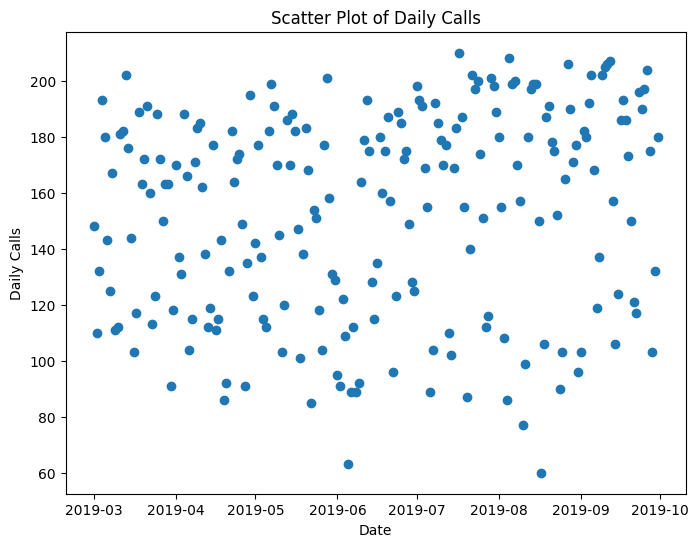

In [292]:
#scatter plot for per days calls
plt.figure(figsize=(8, 6))
plt.scatter(per_day_call_counts.index, per_day_call_counts.values)
plt.xlabel('Date')
plt.ylabel('Daily Calls')
plt.title('Scatter Plot of Daily Calls')
plt.show()


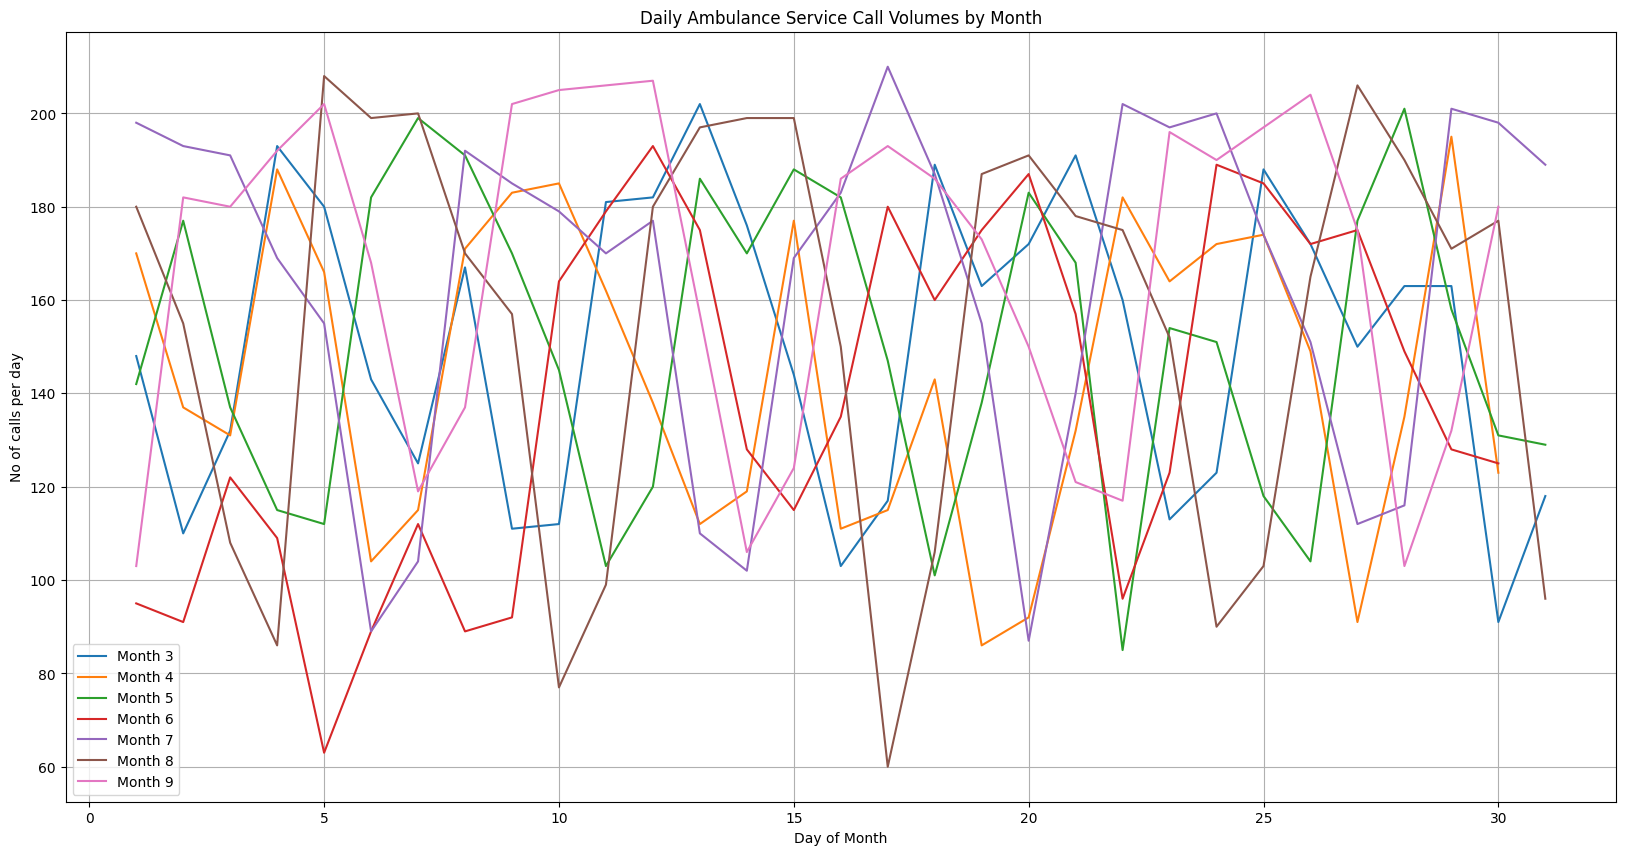

In [293]:
# comparsion seasonal plot for each month
grouped_by_month = per_day_call_counts.groupby(per_day_call_counts.index.month)

# Plot each month's data on the same plot
plt.figure(figsize=(20, 10))
for month, data in grouped_by_month:
    plt.plot(data.index.day, data.values, label=f'Month {month}')

plt.title('Daily Ambulance Service Call Volumes by Month')
plt.xlabel('Day of Month')
plt.ylabel('No of calls per day')
plt.legend()
plt.grid(True)
plt.show()

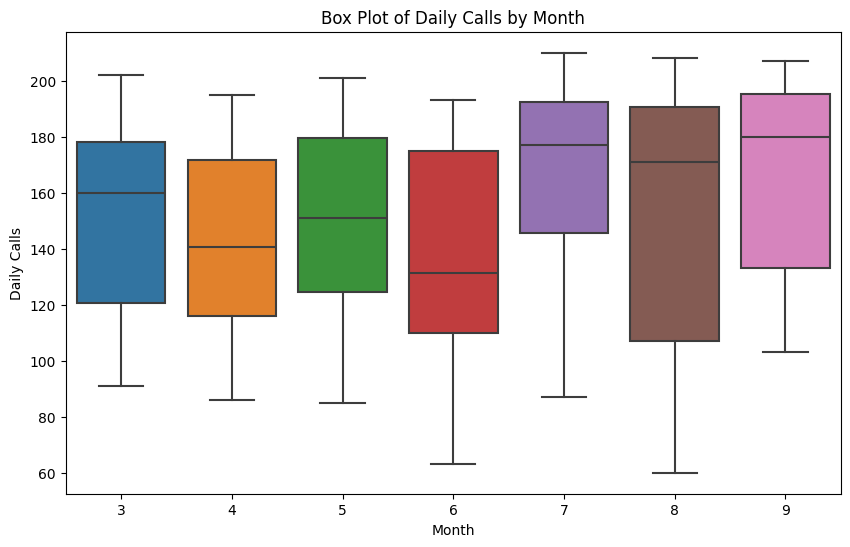

In [294]:
# Box Plot of Daily Calls by Month
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=per_day_call_counts.index.month, y=per_day_call_counts.values)
plt.xlabel('Month')
plt.ylabel('Daily Calls')
plt.title('Box Plot of Daily Calls by Month')
plt.show()

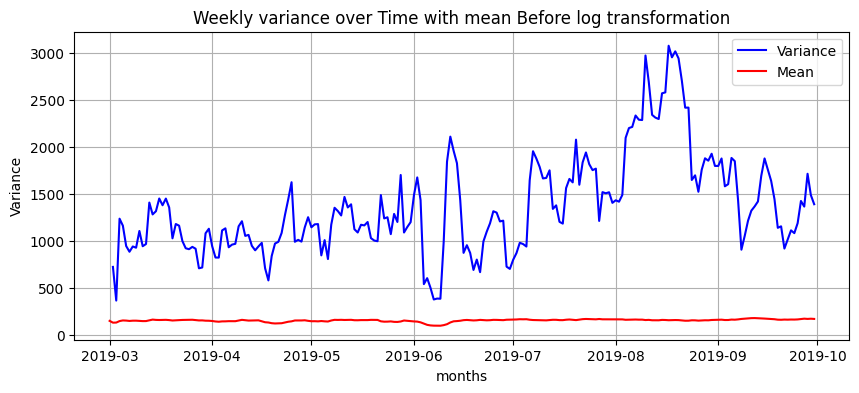

In [295]:
# to check variability of data by using variance and means
weekly_variance = per_day_call_counts.rolling(window=7, min_periods=1).var()
weekly_means = per_day_call_counts.rolling(window=7, min_periods=1).mean()
# Plot the variance over time
plt.figure(figsize=(10, 4))
#plt.plot(variance)
plt.plot(weekly_variance, label='Variance', color='blue')
plt.plot(weekly_means, label='Mean', color='red')
plt.title('Weekly variance over Time with mean Before log transformation')
plt.xlabel('months')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()

**Variance is not stable there is no pattern found over months also sudden fluctuation in june and august.**            
means is approximately constant over time but variance is highly volatile

**decomposition plot**

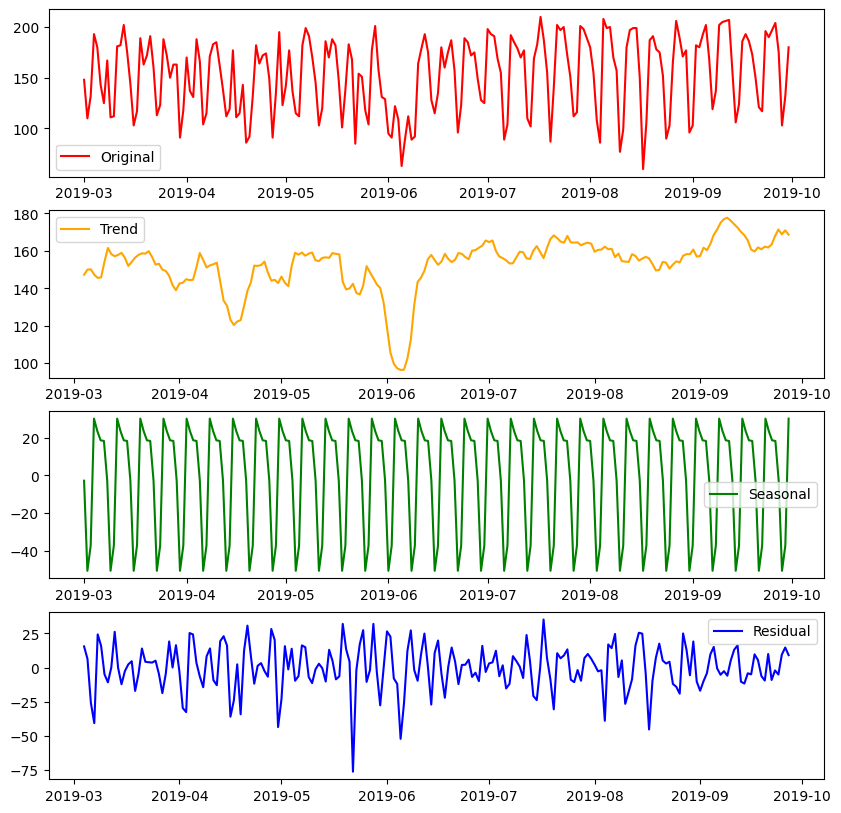

In [296]:
# Decomposition plot to find trend and seasonality in data
bold('**decomposition plot**')
decomposition = seasonal_decompose(per_day_call_counts, model='additive')

# Plot the decomposition
plt.figure(figsize=(10, 10))

# Original time series
plt.subplot(411)
plt.plot(per_day_call_counts.index, per_day_call_counts, label='Original', color = 'red')
plt.legend()

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color = 'orange')
plt.legend()

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color = 'Green')
plt.legend()

# Residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color = 'blue')
plt.legend()
plt.show()

**No clear evidence showing above of variability of data because residual is still fluctuation**
Overall, this decomposition plot suggests that the time series data contains both seasonal patterns and random fluctuations, with no clear long-term trend. Further analysis may be needed to identify the specific factors driving the variability in the data.

In [297]:
# Due variability in data we need transformation of data so that variance will stable with mean over time
log_transformed = np.log(per_day_call_counts)
log_transformed

Call_Date
2019-03-01    4.997212
2019-03-02    4.700480
2019-03-03    4.882802
2019-03-04    5.262690
2019-03-05    5.192957
                ...   
2019-09-26    5.318120
2019-09-27    5.164786
2019-09-28    4.634729
2019-09-29    4.882802
2019-09-30    5.192957
Freq: D, Length: 214, dtype: float64

**Variance over weekly after log transformation**

Call_Date
2019-03-01         NaN
2019-03-02    0.044025
2019-03-03    0.022397
2019-03-04    0.055438
2019-03-05    0.052358
                ...   
2019-09-26    0.058189
2019-09-27    0.057028
2019-09-28    0.078210
2019-09-29    0.066773
2019-09-30    0.063194
Freq: D, Length: 214, dtype: float64


**Mean over weekly after log transformation**

Call_Date
2019-03-01    4.997212
2019-03-02    4.848846
2019-03-03    4.860165
2019-03-04    4.960796
2019-03-05    5.007228
                ...   
2019-09-26    5.099295
2019-09-27    5.121316
2019-09-28    5.098307
2019-09-29    5.115540
2019-09-30    5.103375
Freq: D, Length: 214, dtype: float64


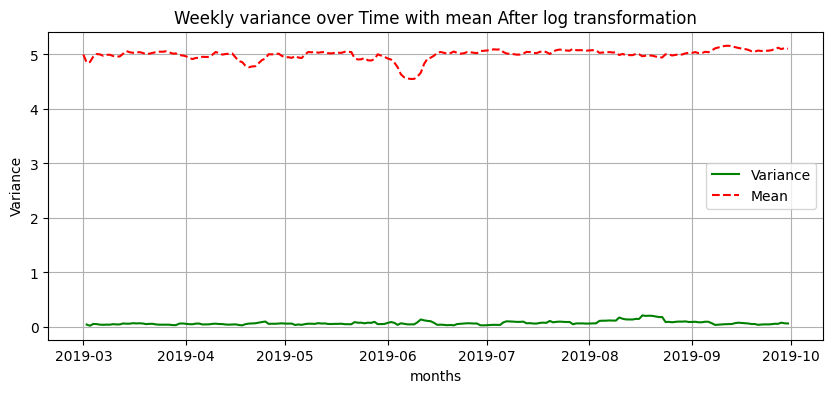

In [298]:
#per_day_call_counts
#plot to check variability after log transformation
transform_weekly_variance = log_transformed.rolling(window=7, min_periods=1).var()
transform_weekly_means = log_transformed.rolling(window=7, min_periods=1).mean()
bold('**Variance over weekly after log transformation**')
print(transform_weekly_variance)
bold('**Mean over weekly after log transformation**')
print(transform_weekly_means)
# Plot the variance over time
plt.figure(figsize=(10, 4))
#plt.plot(variance)
plt.plot(transform_weekly_variance, label='Variance', color='green')
plt.plot(transform_weekly_means, label='Mean', color='red', linestyle='--')
plt.title('Weekly variance over Time with mean After log transformation')
plt.xlabel('months')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()

**IN above observation After transformation variance approximately stable with mean over time**

**WILL Check moving Average**

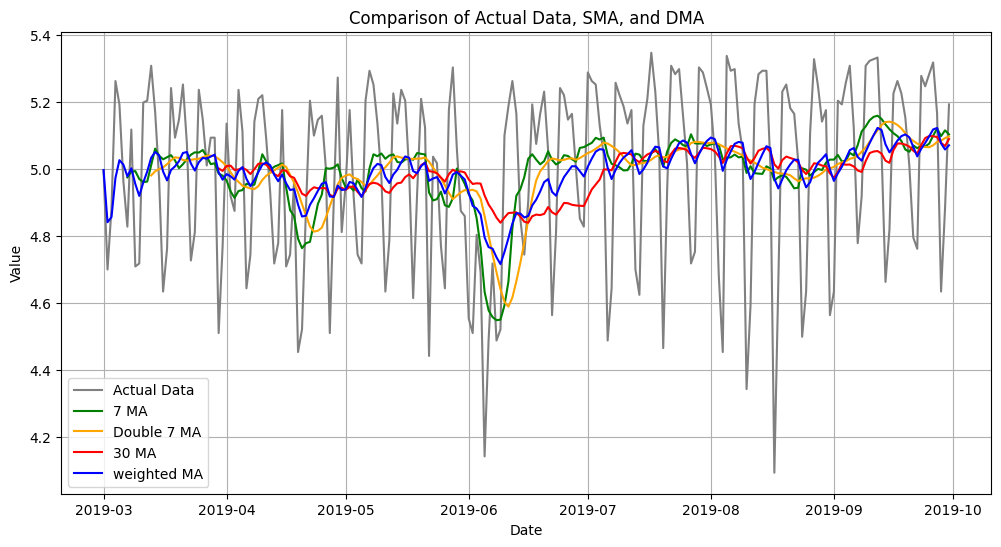

In [299]:
#plotting moving average to find trend of data
Seven_MA = log_transformed.rolling(7).mean() # 7MA
double_Seven_MA = Seven_MA.rolling(7).mean() #double MA
thirty_MA = log_transformed.rolling(30).mean() #30 MA
Wma = log_transformed.ewm(halflife = 7).mean() #Weighted MA
plt.figure(figsize=(12, 6))

plt.plot(log_transformed, label='Actual Data', color='grey')
plt.plot(Seven_MA, label='7 MA', color='green')
plt.plot(double_Seven_MA, label='Double 7 MA', color='orange')
plt.plot(thirty_MA, label='30 MA', color='red')
plt.plot(Wma, label='weighted MA', color='blue')
# Adding label and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of Actual Data, SMA, and DMA')

# Adding legend
plt.legend()

# Showing plot
plt.grid(True)
plt.show()


**NO trend found by apply moving average**

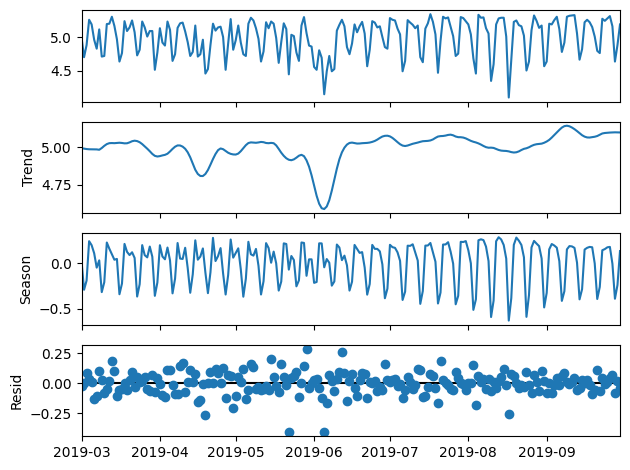

In [300]:
from statsmodels.tsa.seasonal import STL
per_day_call_counts
# Perform STL decomposition
stl = STL(log_transformed, seasonal=7)  # The seasonal parameter specifies the periodicity of the seasonal component
result = stl.fit()

# Plot the decomposition components
fig = result.plot()

# Show the plot
plt.show()

STL decosposition showing seasonality but not about clear trend 

***Modelling***

In [301]:
# Check for negative values
negative_values_exist = (log_transformed <= 0).any()

# Check for zero values
zero_values_exist = (log_transformed == 0).any()

# Print the results
print("Negative values exist:", negative_values_exist)
print("Zero values exist:", zero_values_exist)


Negative values exist: False
Zero values exist: False


In [302]:
#spliting of data for training and testing of models
split_date = '2019-07-31'
# = log_transformed.diff().dropna()
train = log_transformed[log_transformed.index <= split_date]
test = log_transformed[log_transformed.index > split_date]


In [303]:
train, test

(Call_Date
 2019-03-01    4.997212
 2019-03-02    4.700480
 2019-03-03    4.882802
 2019-03-04    5.262690
 2019-03-05    5.192957
                 ...   
 2019-07-27    4.718499
 2019-07-28    4.753590
 2019-07-29    5.303305
 2019-07-30    5.288267
 2019-07-31    5.241747
 Freq: D, Length: 153, dtype: float64,
 Call_Date
 2019-08-01    5.192957
 2019-08-02    5.043425
 2019-08-03    4.682131
 2019-08-04    4.454347
 2019-08-05    5.337538
                 ...   
 2019-09-26    5.318120
 2019-09-27    5.164786
 2019-09-28    4.634729
 2019-09-29    4.882802
 2019-09-30    5.192957
 Freq: D, Length: 61, dtype: float64)

In [304]:
# reversing log transformationto orginal scale
original_scale_data = np.exp(log_transformed)


In [305]:
# #spliting of data for training and testing of models
split_date = '2019-07-31'
original_data_train = original_scale_data[original_scale_data.index <= split_date]
original_data_test = original_scale_data[original_scale_data.index > split_date]
# Baseline models
naive = test.shift(1) # naive baseline model
mean = pd.Series(train.mean(), index=test.index) # mean model
ma = train.rolling(window=30).mean().iloc[-1] #moving average model
print('   ---------------------')
print('|| original test value ||')
print('   ---------------------')
print(original_data_test)
print('   ------------------------')
print('|| naive forecasted value ||')
print('   ------------------------')
print(naive)
print('   ----------------------------')
print('|| mean model forecasted value ||')
print('   ----------------------------')
print(mean)
print('   --------------------------------------')
print('|| Moving average model forecasted value ||')
print('   --------------------------------------')
print(ma)

   ---------------------
|| original test value ||
   ---------------------
Call_Date
2019-08-01    180.0
2019-08-02    155.0
2019-08-03    108.0
2019-08-04     86.0
2019-08-05    208.0
              ...  
2019-09-26    204.0
2019-09-27    175.0
2019-09-28    103.0
2019-09-29    132.0
2019-09-30    180.0
Freq: D, Length: 61, dtype: float64
   ------------------------
|| naive forecasted value ||
   ------------------------
Call_Date
2019-08-01         NaN
2019-08-02    5.192957
2019-08-03    5.043425
2019-08-04    4.682131
2019-08-05    4.454347
                ...   
2019-09-26    5.283204
2019-09-27    5.318120
2019-09-28    5.164786
2019-09-29    4.634729
2019-09-30    4.882802
Freq: D, Length: 61, dtype: float64
   ----------------------------
|| mean model forecasted value ||
   ----------------------------
Call_Date
2019-08-01    4.978159
2019-08-02    4.978159
2019-08-03    4.978159
2019-08-04    4.978159
2019-08-05    4.978159
                ...   
2019-09-26    4.978159
2019-

In [306]:
def check_neg_zero_val(data):
    # Check for negative values
    negative_values_exist = (data <= 0).any()
    # Check for zero values
    zero_values_exist = (data == 0).any()

    # Print the results
    print("Negative values exist:", negative_values_exist)
    print("Zero values exist:", zero_values_exist)


In [307]:
# Exponential Smoothing (SES)   (The simple exponential smoothing forecast method works well when the data has no trend or seasonality.)
ses_model = ExponentialSmoothing(train, trend='add', seasonal='add').fit()
ses_forecast = ses_model.forecast(len(test))

check_neg_zero_val(ses_forecast)
# forecasting is over log transformed data so need reverse transformation so that I can get original scale
original_ses_forecast = np.exp(ses_forecast)

print('   ------------------')
print('|| log transformed ses forecasted value ||')
print('   ------------------')
print(ses_forecast)
print('   ------------------')
print('|| original scale ses forecasted value ||')
print('   ------------------')
print(original_ses_forecast)

Negative values exist: False
Zero values exist: False
   ------------------
|| log transformed ses forecasted value ||
   ------------------
2019-08-01    5.240427
2019-08-02    5.120632
2019-08-03    4.784009
2019-08-04    4.913922
2019-08-05    5.342664
                ...   
2019-09-26    5.277729
2019-09-27    5.157934
2019-09-28    4.821311
2019-09-29    4.951225
2019-09-30    5.379967
Freq: D, Length: 61, dtype: float64
   ------------------
|| original scale ses forecasted value ||
   ------------------
2019-08-01    188.750664
2019-08-02    167.441103
2019-08-03    119.582777
2019-08-04    136.172466
2019-08-05    209.068981
                 ...    
2019-09-26    195.924504
2019-09-27    173.805031
2019-09-28    124.127756
2019-09-29    141.347969
2019-09-30    217.015059
Freq: D, Length: 61, dtype: float64


In [308]:
# Holt Linear  (This method allows forecasting of data with trends)
from statsmodels.tsa.api import Holt
holt_linear_model = ExponentialSmoothing(train, trend='add', damped_trend=True).fit()
holt_linear_forecast = holt_linear_model.forecast(len(test))
check_neg_zero_val(holt_linear_forecast)
# forecasting is over log transformed data so need reverse transformation so that I can get original scale
original_holt_linear_forecast = np.exp(holt_linear_forecast)

print('   ------------------')
print('|| log transformed Holt linear forecasted value ||')
print('   ------------------')
print(holt_linear_forecast)
print('   ------------------')
print('|| original scale Holt linear forecasted value ||')
print('   ------------------')
print(original_holt_linear_forecast)

Negative values exist: False
Zero values exist: False
   ------------------
|| log transformed Holt linear forecasted value ||
   ------------------
2019-08-01    5.045052
2019-08-02    5.045045
2019-08-03    5.045039
2019-08-04    5.045033
2019-08-05    5.045026
                ...   
2019-09-26    5.044887
2019-09-27    5.044886
2019-09-28    5.044885
2019-09-29    5.044884
2019-09-30    5.044883
Freq: D, Length: 61, dtype: float64
   ------------------
|| original scale Holt linear forecasted value ||
   ------------------
2019-08-01    155.252409
2019-08-02    155.251354
2019-08-03    155.250338
2019-08-04    155.249357
2019-08-05    155.248412
                 ...    
2019-09-26    155.226723
2019-09-27    155.226585
2019-09-28    155.226452
2019-09-29    155.226324
2019-09-30    155.226200
Freq: D, Length: 61, dtype: float64


In [309]:
# Holt-Winter's additive (when the data is seasonal without any exponential seasonality)
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit a Holt-Winters model to training data
holt_winters_model = ExponentialSmoothing(train, seasonal='add').fit()

# forecasts for the testing data
holt_winters_forecast = holt_winters_model.forecast(len(test))
check_neg_zero_val(holt_winters_forecast)
# forecasting is over log transformed data so need reverse transformation so that I can get original scale
original_holt_winter_forecast = np.exp(holt_winters_forecast)

print('   ------------------')
print('|| log transformed Holt linear forecasted value ||')
print('   ------------------')
print(holt_winters_forecast)
print('   ------------------')
print('|| original scale Holt linear forecasted value ||')
print('   ------------------')
print(original_holt_winter_forecast)

Negative values exist: False
Zero values exist: False
   ------------------
|| log transformed Holt linear forecasted value ||
   ------------------
2019-08-01    5.238940
2019-08-02    5.118398
2019-08-03    4.781140
2019-08-04    4.910406
2019-08-05    5.338514
                ...   
2019-09-26    5.238940
2019-09-27    5.118398
2019-09-28    4.781140
2019-09-29    4.910406
2019-09-30    5.338514
Freq: D, Length: 61, dtype: float64
   ------------------
|| original scale Holt linear forecasted value ||
   ------------------
2019-08-01    188.470179
2019-08-02    167.067536
2019-08-03    119.240243
2019-08-04    135.694548
2019-08-05    208.203180
                 ...    
2019-09-26    188.470179
2019-09-27    167.067536
2019-09-28    119.240243
2019-09-29    135.694548
2019-09-30    208.203180
Freq: D, Length: 61, dtype: float64


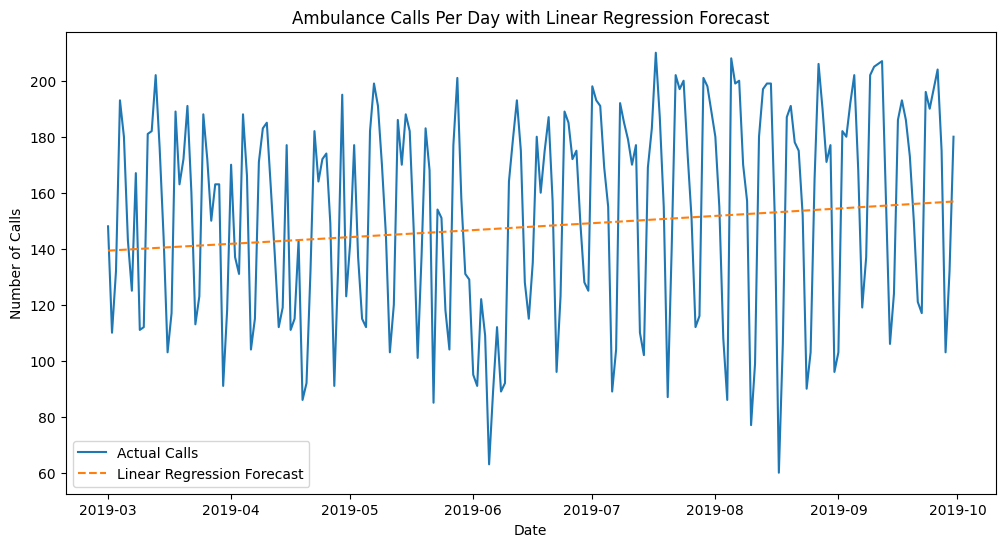

In [310]:
# simple linear regression model
from sklearn.linear_model import LinearRegression

# Create features (X) and target variable (y)

X = np.arange(len(log_transformed)).reshape(-1, 1)  # Use the index as features

y = log_transformed.values  # Target variable is the daily call volumes

# Fit the linear regression model
model_lr = LinearRegression()
model_lr.fit(X, y)

# Predict call volumes using linear regression model
lr_forecast = model_lr.predict(X)
# forecasting is over log transformed data so need reverse transformation so that I can get original scale
original_linear_regression_forecast = np.exp(lr_forecast)
# Plot the original data and linear regression forecast
plt.figure(figsize=(12, 6))
plt.plot(np.exp(log_transformed).index, np.exp(log_transformed), label='Actual Calls')
plt.plot(np.exp(log_transformed).index, original_linear_regression_forecast, label='Linear Regression Forecast', linestyle='--')
plt.title('Ambulance Calls Per Day with Linear Regression Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend()
plt.show()

In [311]:
# Dropna from both datasets
naive_cleaned = naive.dropna()
test_cleaned = test.loc[naive_cleaned.index]


In [312]:
# Error Statistics of naive model on original scale
naive_mse = mean_squared_error(np.exp(test_cleaned), np.exp(naive_cleaned))
naive_mape = mean_absolute_percentage_error(np.exp(test_cleaned), np.exp(naive_cleaned))
naive_mse,naive_mape

(1847.7666666666662, 0.24002735704830033)

In [313]:
# Error Statistics of mean model on original scale
mean_mse = mean_squared_error(np.exp(test), np.exp(mean))
mean_mape = mean_absolute_percentage_error(np.exp(test), np.exp(mean))
mean_mse,mean_mape

(1852.377618037537, 0.2733627441369674)

In [314]:
# Error Statistics of SES model on original scale
ses_mse = mean_squared_error(np.exp(test), original_ses_forecast)
ses_mape = mean_absolute_percentage_error(np.exp(test), original_ses_forecast)
ses_mse,ses_mape

(480.5467531717331, 0.13899733944760986)

In [315]:
# Error Statistics of Holt Linear model on original scale
holt_linear_mse = mean_squared_error(np.exp(test), original_holt_linear_forecast)
holt_linear_mape = mean_absolute_percentage_error(np.exp(test), original_holt_linear_forecast)
holt_linear_mse, holt_linear_mape

(1641.8398735309106, 0.26697863154496193)

In [316]:
# Error Statistics of Holt's winter additive model on original scale
holt_winters_mse = mean_squared_error(np.exp(test), original_holt_winter_forecast)
holt_winters_mape = mean_absolute_percentage_error(np.exp(test), original_holt_winter_forecast)
holt_winters_mse, holt_winters_mape

(414.88742948211166, 0.1282939735624562)

In [317]:
# Error Statistics of simple linear regression model on original scale
linear_regression_mse = mean_squared_error(np.exp(y), original_linear_regression_forecast)
linear_regression_mape = mean_absolute_percentage_error(np.exp(y), original_linear_regression_forecast)
linear_regression_mse,linear_regression_mape

(1351.1400475905227, 0.2395537914345775)

In [318]:
# Generate forecast for the mean model
forecast_mean = np.exp(pd.Series(train.mean(), index=test.index))
forecast_mean

Call_Date
2019-08-01    145.206764
2019-08-02    145.206764
2019-08-03    145.206764
2019-08-04    145.206764
2019-08-05    145.206764
                 ...    
2019-09-26    145.206764
2019-09-27    145.206764
2019-09-28    145.206764
2019-09-29    145.206764
2019-09-30    145.206764
Freq: D, Length: 61, dtype: float64

In [319]:
# Generate forecast for the naive model
forecast_naive = np.exp(test.shift(1))
forecast_naive

Call_Date
2019-08-01      NaN
2019-08-02    180.0
2019-08-03    155.0
2019-08-04    108.0
2019-08-05     86.0
              ...  
2019-09-26    197.0
2019-09-27    204.0
2019-09-28    175.0
2019-09-29    103.0
2019-09-30    132.0
Freq: D, Length: 61, dtype: float64

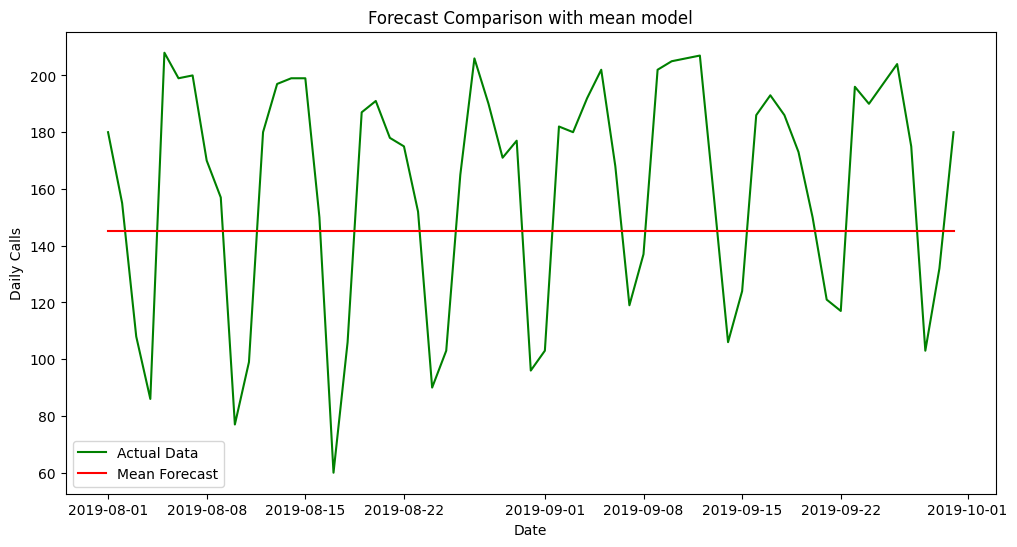

In [320]:
# Plot Forecast Comparison with mean model
test_date = '2019-07-31'
actual_data = per_day_call_counts[per_day_call_counts.index > test_date]
plt.figure(figsize=(12, 6))
plt.plot(np.exp(test).index, actual_data, label='Actual Data', linestyle = '-',color = 'green')
plt.plot(np.exp(test).index, np.exp(mean).values, label='Mean Forecast', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Daily Calls')
plt.title('Forecast Comparison with mean model')
plt.legend()
plt.show()

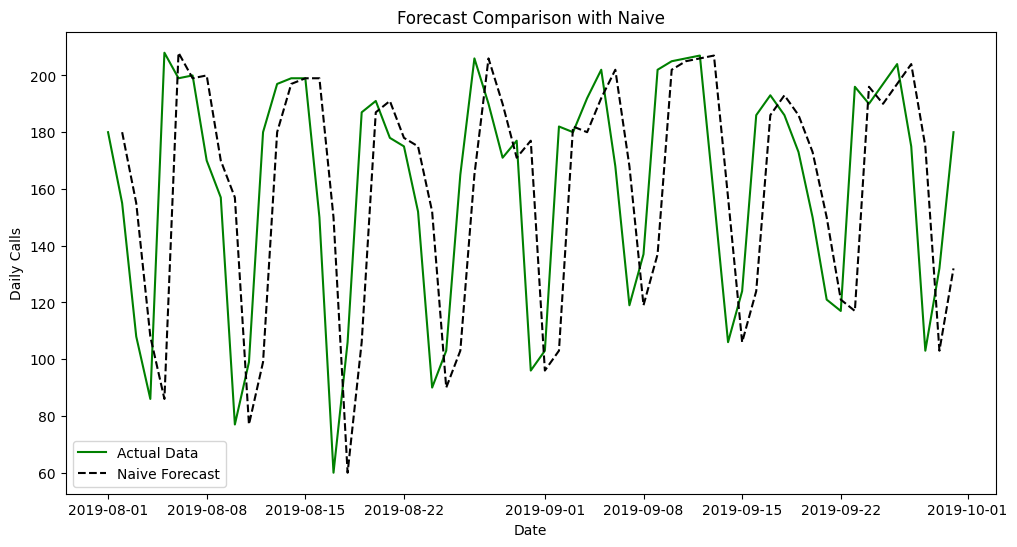

In [321]:
# Plot Forecast Comparison with Naive
test_date = '2019-07-31'
#train = per_day_call_counts[log_transformed.index <= test_date]
actual_data = per_day_call_counts[per_day_call_counts.index > test_date]
plt.figure(figsize=(12, 6))
plt.plot(np.exp(test).index, actual_data, label='Actual Data', linestyle = '-',color = 'green')
plt.plot(np.exp(test).index, np.exp(naive.values), label='Naive Forecast', linestyle='--', color='Black')
plt.xlabel('Date')
plt.ylabel('Daily Calls')
plt.title('Forecast Comparison with Naive')
plt.legend()
plt.show()

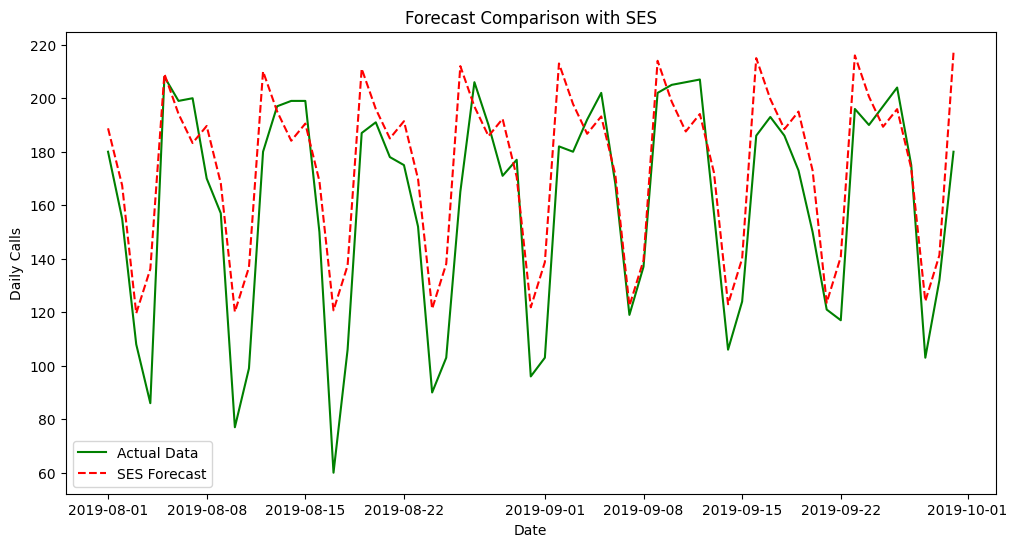

In [322]:
# Plot Forecast Comparison with SES
test_date = '2019-07-31'
actual_data = per_day_call_counts[per_day_call_counts.index > test_date]
plt.figure(figsize=(12, 6))
plt.plot(np.exp(test).index, actual_data, label='Actual Data', linestyle = '-',color = 'green')
plt.plot(np.exp(test).index, original_ses_forecast.values, label='SES Forecast', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Daily Calls')
plt.title('Forecast Comparison with SES')
plt.legend()
plt.show()

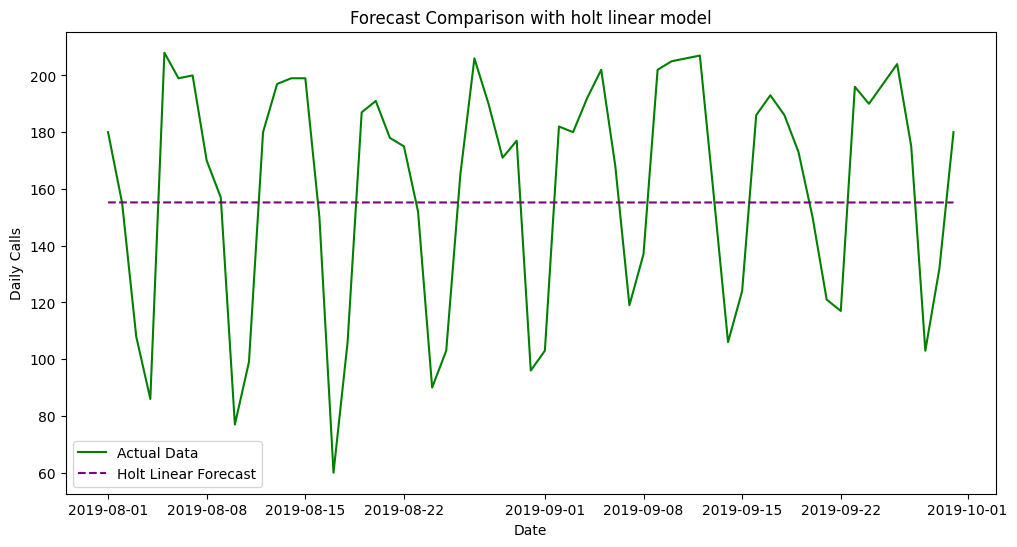

In [323]:
# Plot Forecast Comparison with holt linear model
test_date = '2019-07-31'
#train = per_day_call_counts[log_transformed.index <= test_date]
actual_data = per_day_call_counts[per_day_call_counts.index > test_date]
plt.figure(figsize=(12, 6))
plt.plot(np.exp(test).index, actual_data, label='Actual Data', linestyle = '-',color = 'green')
plt.plot(np.exp(test).index, original_holt_linear_forecast.values, label='Holt Linear Forecast', linestyle='--', color='purple')
plt.xlabel('Date')
plt.ylabel('Daily Calls')
plt.title('Forecast Comparison with holt linear model')
plt.legend()
plt.show()

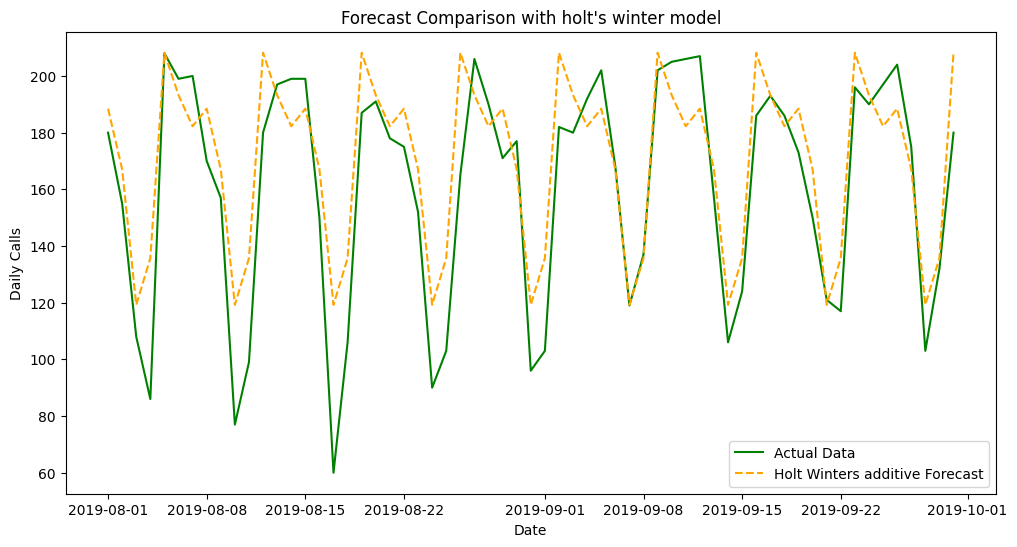

In [324]:
# Plot Forecast Comparison with holt\'s winter model
test_date = '2019-07-31'
#train = per_day_call_counts[log_transformed.index <= test_date]
actual_data = per_day_call_counts[per_day_call_counts.index > test_date]
plt.figure(figsize=(12, 6))
plt.plot(np.exp(test).index, actual_data, label='Actual Data', linestyle = '-',color = 'green')
plt.plot(np.exp(test).index, original_holt_winter_forecast.values, label='Holt Winters additive Forecast', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Daily Calls')
plt.title('Forecast Comparison with holt\'s winter model')
plt.legend()
plt.show()

**Dickey fuller test to check stationary of data**

In [325]:
#Dickey fuller test to check stationary of data
from statsmodels.tsa.stattools import adfuller
time_series = log_transformed.values
# Perform the Dickey-Fuller test
result = adfuller(time_series)
print(result)
# Print the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')


(-2.3641435761008953, 0.1521133482396313, 14, 199, {'1%': -3.4636447617687436, '5%': -2.8761761179270766, '10%': -2.57457158581854}, -159.56881153746707)
ADF Statistic: -2.3641435761008953
p-value: 0.1521133482396313
Critical Values:
	1%: -3.4636447617687436
	5%: -2.8761761179270766
	10%: -2.57457158581854


**result showing data is not stationary because (adf statistics > critical) values and p-values is also greater than zero**

****lets make data stationary by using order of differencing****

In [326]:
# apply first order of differencing
first_diff_per_day_call_counts = log_transformed.diff().dropna()
print(first_diff_per_day_call_counts.head())

Call_Date
2019-03-02   -0.296732
2019-03-03    0.182322
2019-03-04    0.379888
2019-03-05   -0.069733
2019-03-06   -0.230112
Freq: D, dtype: float64


In [327]:
# Perform the Dickey-Fuller test on first order differencing
result1 = adfuller(first_diff_per_day_call_counts)
print(result1)
# Print the test results
print('ADF Statistic:', result1[0])
print('p-value:', result1[1])
print('Critical Values:')
for key, value in result1[4].items():
    print(f'\t{key}: {value}')

(-6.202359568301918, 5.766069601264871e-08, 13, 199, {'1%': -3.4636447617687436, '5%': -2.8761761179270766, '10%': -2.57457158581854}, -154.2099204799668)
ADF Statistic: -6.202359568301918
p-value: 5.766069601264871e-08
Critical Values:
	1%: -3.4636447617687436
	5%: -2.8761761179270766
	10%: -2.57457158581854


**Now data is showing that it is stationary  because ADF (statistics < critical values) and P-value is also less than zero.**
No need of second order differencing

<Figure size 800x500 with 0 Axes>

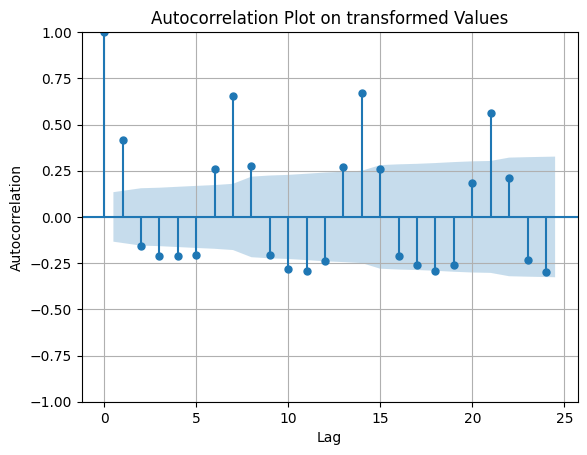

<Figure size 800x500 with 0 Axes>

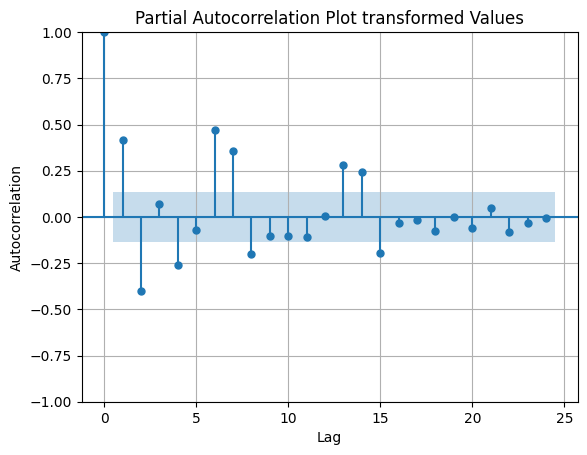

In [328]:
# Plot autocorrelation function and PACF plot on log-transformed data
plt.figure(figsize=(8,5))
plot_acf(log_transformed)  # Adjust the number of lags as needed
plt.title('Autocorrelation Plot on transformed Values')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()
plt.figure(figsize=(8,5))
plot_pacf(log_transformed)  # Adjust the number of lags as needed
plt.title('Partial Autocorrelation Plot transformed Values')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

<Figure size 1000x400 with 0 Axes>

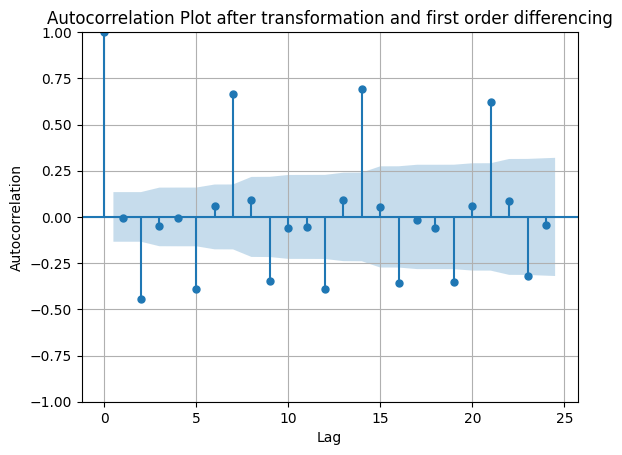

<Figure size 1000x400 with 0 Axes>

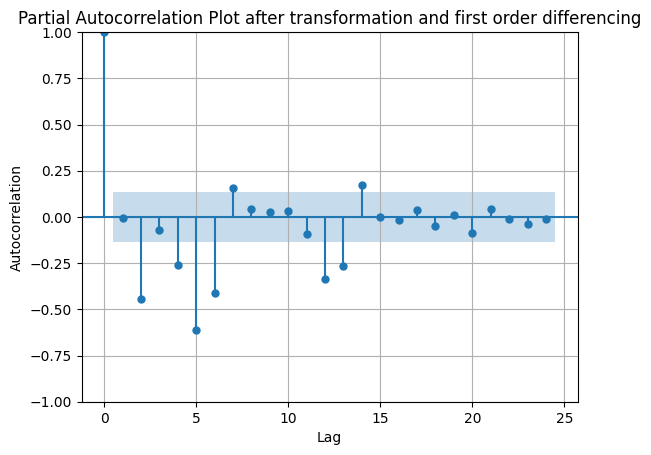

In [329]:
# Plot autocorrelation function and PACF plot on on first order differencing data
from statsmodels.graphics.tsaplots import plot_acf
# Plot autocorrelation function
plt.figure(figsize=(10,4))
plot_acf(first_diff_per_day_call_counts)  # Adjust the number of lags as needed
plt.title('Autocorrelation Plot after transformation and first order differencing')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()
plt.figure(figsize=(10,4))
plot_pacf(first_diff_per_day_call_counts)  # Adjust the number of lags as needed
plt.title('Partial Autocorrelation Plot after transformation and first order differencing')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

In [355]:
#Arima MOdel
split_date = '2019-07-31'
train_arima = log_transformed[log_transformed.index <= split_date]
test_arima = log_transformed[log_transformed.index > split_date]
arima_model = ARIMA(train_arima, order=(14,1,0)).fit()

'''ARIMA(14,1,0)
AIC: -99.00688721465113
BIC: -53.64867940195698

ARIMA(1,1,0)
AIC: 43.61179756971295
BIC: 49.6595586114055

ARIMA(5,1,0)
AIC: -44.01667685239491
BIC: -25.87339372731725

ARIMA(12,1,0)
AIC: -81.52030947643706
BIC: -42.20986270543547

aic = arima_model.aic
bic = arima_model.bic

print("AIC:", aic)
print("BIC:", bic)

'''
arima_forecast = arima_model.forecast(steps=len(test_arima))[0]
# Convert arima_forecast to a one-dimensional array
arima_forecast = arima_forecast.ravel()

# Ensure that arima_forecast has the same length as the test dataset
if len(arima_forecast) != len(test_arima):
    # Adjust the length of arima_forecast if needed (e.g., by trimming or padding)
    arima_forecast = arima_forecast[:len(test_arima)]  # Trim to match the length of test dataset
# Forecast values for the same length as the test dataset
arima_forecast = arima_model.forecast(steps=len(test_arima))
# Extract forecasted values from the tuple returned by the forecast method
arima_forecast_values = arima_forecast
orginal_scale_arima = np.exp(arima_forecast_values)
print('||----------------------||')
print(arima_forecast_values)
print('||-----------------------||')
print('||----------------------||')
print(orginal_scale_arima)
print('||-----------------------||')
# Error Statistics on transformed  forecasted values 
arima_tmse = mean_squared_error(test_arima, arima_forecast_values)
arima_tmape = mean_absolute_percentage_error(test_arima, arima_forecast_values)
print(arima_tmse, arima_tmape)
# Error Statistics on original scale
arima_mse = mean_squared_error(np.exp(test_arima), orginal_scale_arima)
arima_mape = mean_absolute_percentage_error(np.exp(test_arima), orginal_scale_arima)
print(arima_mse,arima_mape)

AIC: -81.52030947643706
BIC: -42.20986270543547
||----------------------||
2019-08-01    5.256287
2019-08-02    4.934545
2019-08-03    4.745396
2019-08-04    4.907089
2019-08-05    5.202770
                ...   
2019-09-26    5.138160
2019-09-27    5.020518
2019-09-28    4.945703
2019-09-29    5.016226
2019-09-30    5.118818
Freq: D, Name: predicted_mean, Length: 61, dtype: float64
||-----------------------||
||----------------------||
2019-08-01    191.768200
2019-08-02    139.009875
2019-08-03    115.053365
2019-08-04    135.245097
2019-08-05    181.775127
                 ...    
2019-09-26    170.401948
2019-09-27    151.489782
2019-09-28    140.569672
2019-09-29    150.840895
2019-09-30    167.137659
Freq: D, Name: predicted_mean, Length: 61, dtype: float64
||-----------------------||
0.03495005402435429 0.028249090934690017
541.8507205290496 0.14936984106330461


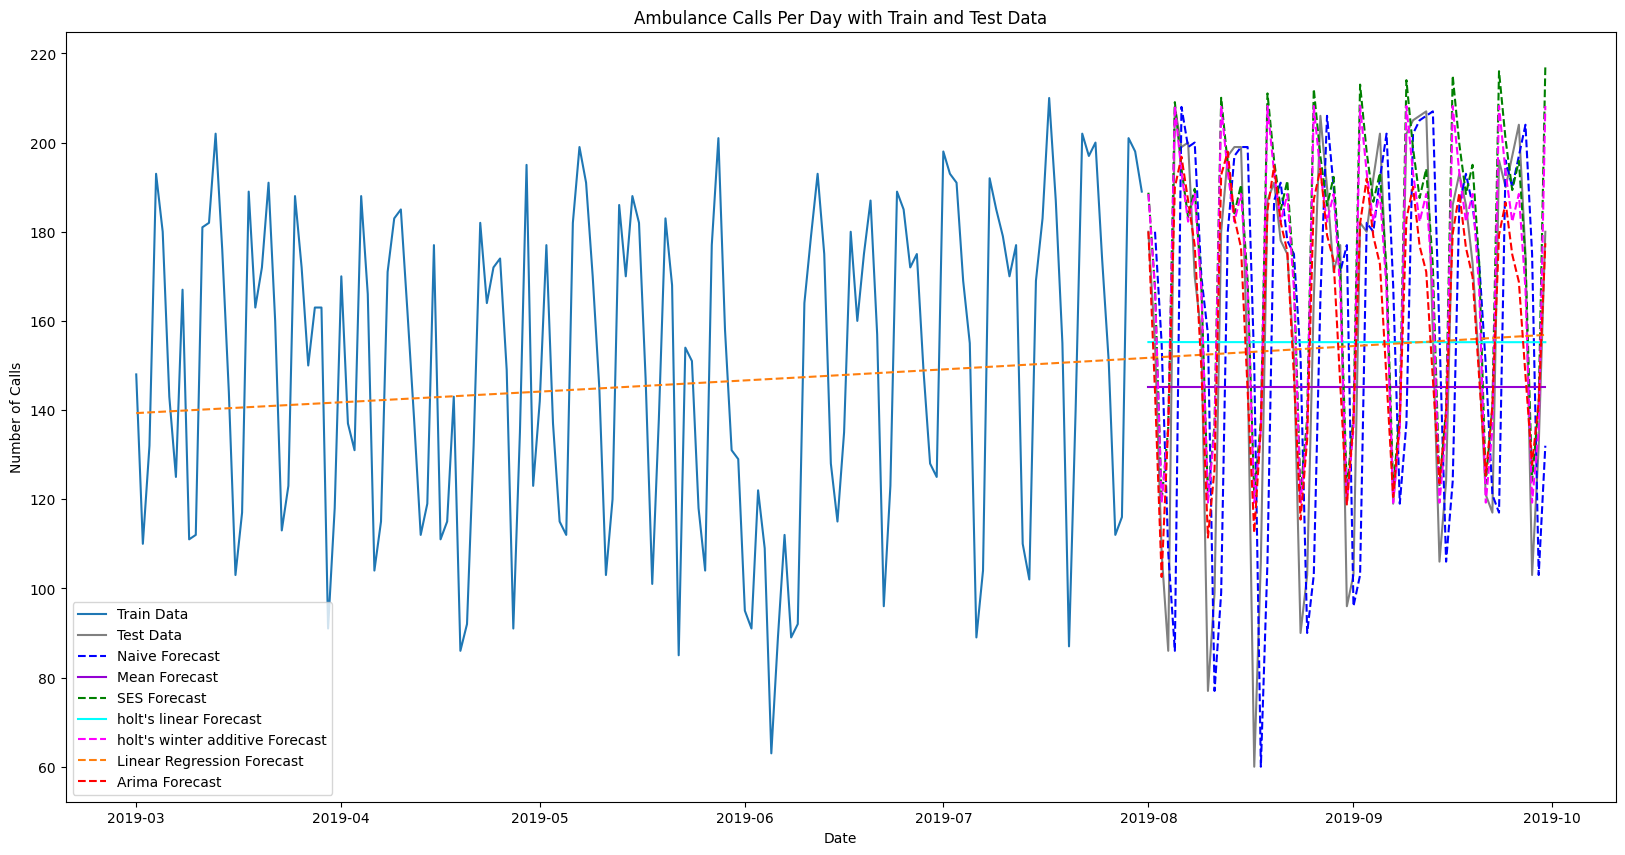

In [331]:
# Plot train and test data along with the forecasted values
plt.figure(figsize=(20, 10))
plt.plot(np.exp(train).index, np.exp(train), label='Train Data')
plt.plot(np.exp(test).index, np.exp(test), label='Test Data', color = 'grey')
plt.plot(forecast_naive.index, forecast_naive.values, label='Naive Forecast', linestyle='--', color='blue')
plt.plot(forecast_mean.index, forecast_mean.values, label='Mean Forecast', linestyle='-', color='darkviolet')
plt.plot(original_ses_forecast.index, original_ses_forecast.values, label='SES Forecast', linestyle='--', color='green')
plt.plot(original_holt_linear_forecast.index, original_holt_linear_forecast.values, label='holt\'s linear Forecast', linestyle='-', color='cyan')
plt.plot(original_holt_winter_forecast.index, original_holt_winter_forecast.values, label='holt\'s winter additive Forecast', linestyle='--', color='magenta')
plt.plot(np.exp(log_transformed).index, original_linear_regression_forecast, label='Linear Regression Forecast', linestyle='--')
plt.plot(np.exp(orginal_scale_arima).index, orginal_scale_arima, label='Arima Forecast', linestyle='--', color = 'red')
plt.title('Ambulance Calls Per Day with Train and Test Data')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend()
plt.show()

**Graph comparsion is also showing Arima is better perform than other model, secondly holt winter is also considerable better performing. considerable difference between arima and holt winter model**

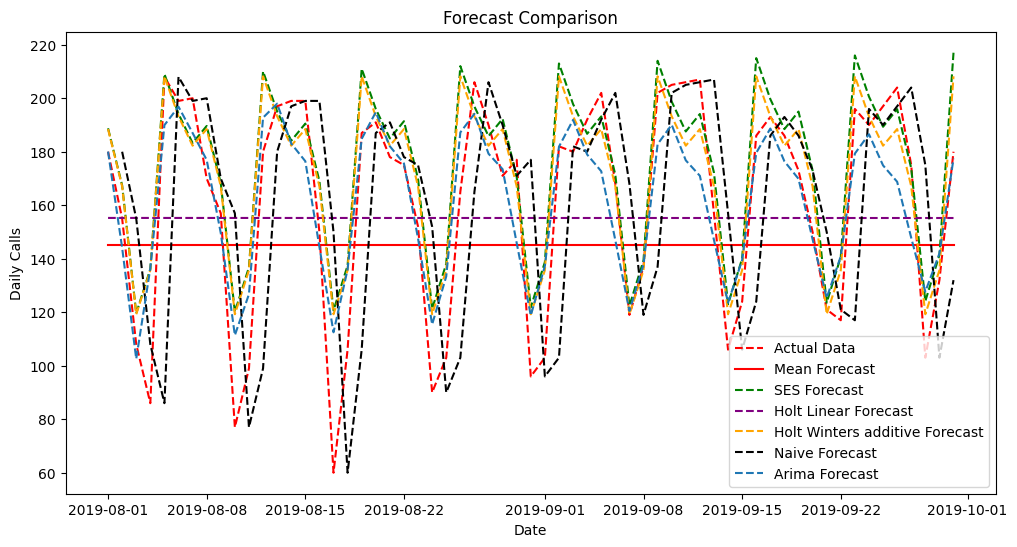

In [332]:
# Plot forecasts for each model with test data
test_date = '2019-07-31'
#train = per_day_call_counts[log_transformed.index <= test_date]
actual_data = per_day_call_counts[per_day_call_counts.index > test_date]
plt.figure(figsize=(12, 6))
plt.plot(np.exp(test).index, actual_data, label='Actual Data', linestyle = '--',color = 'red')
plt.plot(np.exp(test).index, np.exp(mean).values, label='Mean Forecast', linestyle='-', color='red')
plt.plot(np.exp(test).index, original_ses_forecast.values, label='SES Forecast', linestyle='--', color='green')
plt.plot(np.exp(test).index, original_holt_linear_forecast.values, label='Holt Linear Forecast', linestyle='--', color='purple')
plt.plot(np.exp(test).index, original_holt_winter_forecast.values, label='Holt Winters additive Forecast', linestyle='--', color='orange')
plt.plot(np.exp(test).index, np.exp(naive.values), label='Naive Forecast', linestyle='--', color='Black')
plt.plot(np.exp(test).index, orginal_scale_arima, label='Arima Forecast', linestyle='--')
#plt.plot(test.index, arima_forecast_values, label='ARIMA Forecast', linestyle='--', color='magenta')

plt.xlabel('Date')
plt.ylabel('Daily Calls')
plt.title('Forecast Comparison')
plt.legend()
plt.show()

In [333]:
#Error statistics on transformed forecast values
naive_tmse = mean_squared_error(test_cleaned, naive_cleaned)
naive_tmape = mean_absolute_percentage_error(test_cleaned, naive_cleaned)

mean_tmse = mean_squared_error(test, mean)
mean_tmape = mean_absolute_percentage_error(test, mean)


ses_tmse = mean_squared_error(test, ses_forecast)
ses_tmape = mean_absolute_percentage_error(test, ses_forecast)

holt_linear_tmse = mean_squared_error(test, holt_linear_forecast)
holt_linear_tmape = mean_absolute_percentage_error(test, holt_linear_forecast)

holt_winters_tmse = mean_squared_error(test, holt_winters_forecast)
holt_winters_tmape = mean_absolute_percentage_error(test, holt_winters_forecast)

linear_regression_tmse = mean_squared_error(y, lr_forecast)
linear_regression_tmape = mean_absolute_percentage_error(y, lr_forecast)


error_statistics = pd.DataFrame({
    'Model': ['Naive', 'Mean', 'SES', 'Holt Linear', 'Holt Winters_additive', 'linear_regression','Arima'],
    'MSE': [naive_tmse, mean_tmse, ses_tmse, holt_linear_tmse, holt_winters_tmse, linear_regression_tmse, arima_tmse],
    'MAPE': [naive_tmape, mean_tmape, ses_tmape, holt_linear_tmape, holt_winters_tmape,linear_regression_tmape, arima_tmape]
})
bold('**Error Statistics on transformed forecasted values**')
print(error_statistics)

**Error Statistics on transformed forecasted values**

                   Model       MSE      MAPE
0                  Naive  0.106521  0.047350
1                   Mean  0.090513  0.053746
2                    SES  0.030812  0.025584
3            Holt Linear  0.086573  0.049565
4  Holt Winters_additive  0.027788  0.023836
5      linear_regression  0.070597  0.045912
6                  Arima  0.026031  0.023134


In [334]:
# Comparison of Error Statistics on original scale

error_statistics = pd.DataFrame({
    'Model': ['Naive', 'Mean', 'SES', 'Holt Linear', 'Holt Winters_additive', 'linear_regression', 'Arima'],
    'MSE': [naive_mse, mean_mse, ses_mse, holt_linear_mse, holt_winters_mse,  linear_regression_mse, arima_mse],
    'MAPE': [naive_mape, mean_mape, ses_mape, holt_linear_mape, holt_winters_mape,linear_regression_mape, arima_mape]
})
print(error_statistics)

                   Model          MSE      MAPE
0                  Naive  1847.766667  0.240027
1                   Mean  1852.377618  0.273363
2                    SES   480.546753  0.138997
3            Holt Linear  1641.839874  0.266979
4  Holt Winters_additive   414.887429  0.128294
5      linear_regression  1351.140048  0.239554
6                  Arima   395.877781  0.120379


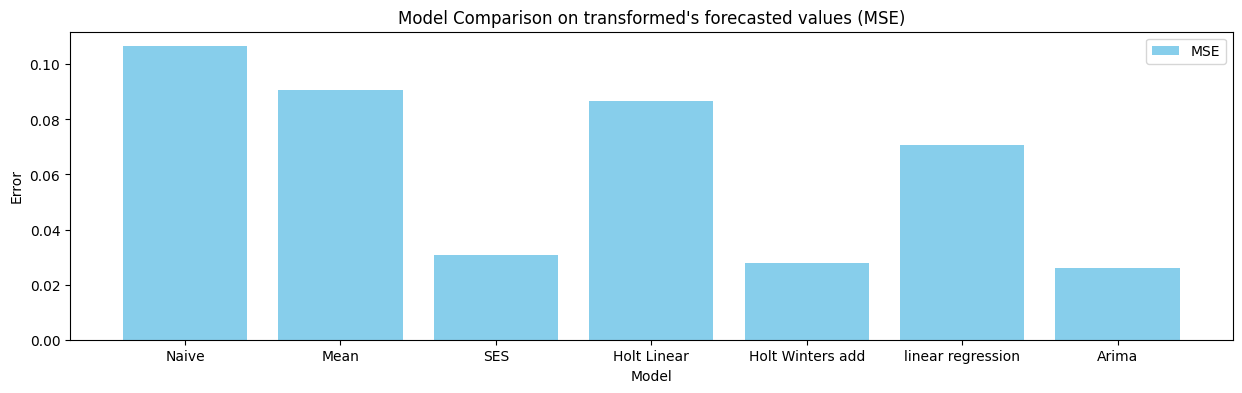

In [335]:
# Model Comparison bar Graph
plt.figure(figsize=(15, 4))

# Plot error statistics for each model
models = ['Naive', 'Mean', 'SES', 'Holt Linear', 'Holt Winters add','linear regression','Arima']
mse_values = [naive_tmse, mean_tmse, ses_tmse, holt_linear_tmse, holt_winters_tmse,linear_regression_tmse, arima_tmse]
plt.bar(models, mse_values, color='skyblue', label='MSE')

plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Model Comparison on transformed\'s forecasted values (MSE)')
plt.legend()
plt.show()

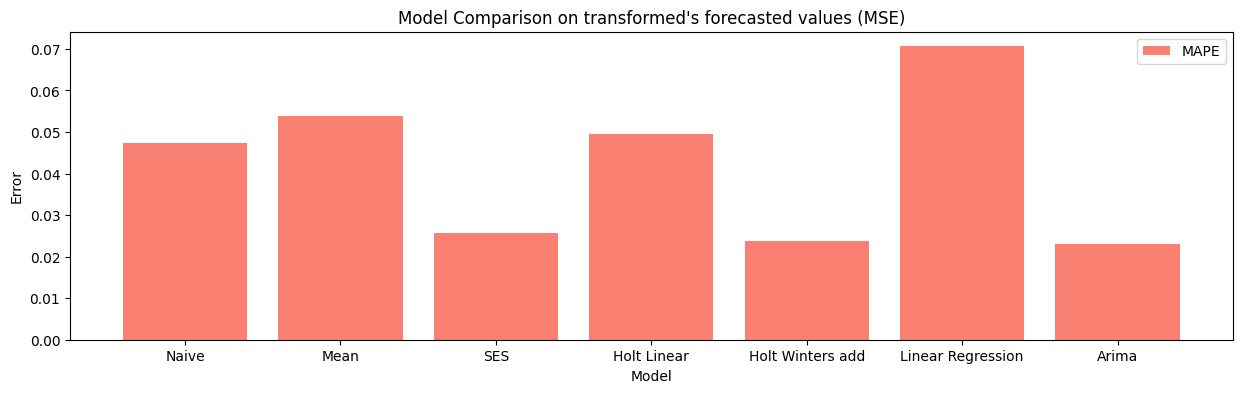

In [336]:
#model comparsion MAPE bar graph of transformed values
plt.figure(figsize=(15, 4))

# Plot error statistics for each model
models = ['Naive', 'Mean', 'SES', 'Holt Linear', 'Holt Winters add', 'Linear Regression','Arima']
mape_values = [naive_tmape, mean_tmape, ses_tmape, holt_linear_tmape, holt_winters_tmape, linear_regression_tmse,arima_tmape]
plt.bar(models, mape_values, color='salmon', label='MAPE')
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Model Comparison on transformed\'s forecasted values (MSE)')
plt.legend()
plt.show()

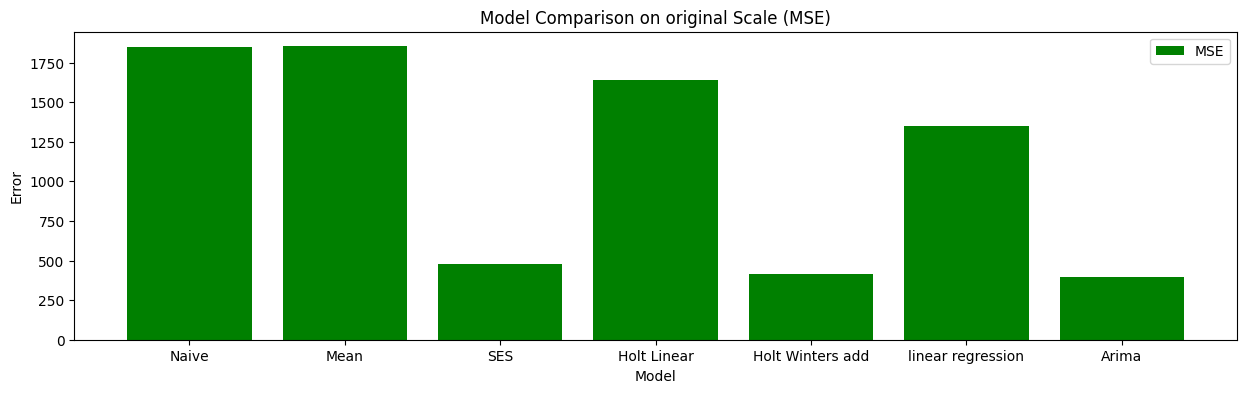

In [337]:
# Model Comparison MSE barGraph on original scale
plt.figure(figsize=(15, 4))
# Plot error statistics for each model
models = ['Naive', 'Mean', 'SES', 'Holt Linear', 'Holt Winters add','linear regression', 'Arima']
mse_values = [naive_mse, mean_mse, ses_mse, holt_linear_mse, holt_winters_mse,linear_regression_mse, arima_mse]
plt.bar(models, mse_values, color='green', label='MSE')
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Model Comparison on original Scale (MSE)')
plt.legend()
plt.show()

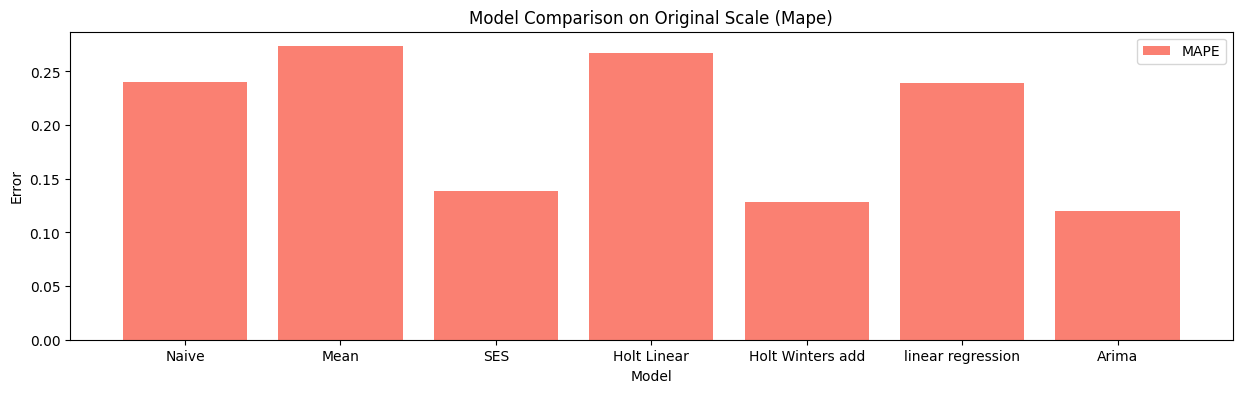

In [338]:
# Model Comparison MAPE bar Graph on original scale
plt.figure(figsize=(15, 4))
# Plot error statistics for each model
models = ['Naive', 'Mean', 'SES', 'Holt Linear', 'Holt Winters add', 'linear regression', 'Arima']
mape_values = [naive_mape, mean_mape, ses_mape, holt_linear_mape, holt_winters_mape, linear_regression_mape, arima_mape]
plt.bar(models, mape_values, color='salmon', label='MAPE')
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Model Comparison on Original Scale (Mape)')
plt.legend()
plt.show()

**Arima Model is performing well as compared to other model SO, we will two month forecast by using Arima.** 

In [343]:
# forecasting from 01/10/2019 to 30/11/2019
from datetime import datetime
forecast_from = '2019-10-01'
forecast_to = '2019-11-30'
forecast_from_date = datetime.strptime(forecast_from, '%Y-%m-%d')
forecast_to_date = datetime.strptime(forecast_to, '%Y-%m-%d')
total_forecast_length = (forecast_to_date - forecast_from_date).days + 1
arima_forecast = arima_model.forecast(steps=len(test_arima)+total_forecast_length)
orginal_scale_arima_forecast = np.exp(arima_forecast)
print('-----------------------------')
print('Arima transformed forecasted values')
print('-----------------------------')
print(arima_forecast)
print('-----------------------------')
print('Original scale Arima forecasted values')
print('-----------------------------')
print(orginal_scale_arima_forecast)

-----------------------------
Arima transformed forecasted values
-----------------------------
2019-08-01    5.193317
2019-08-02    4.970391
2019-08-03    4.630476
2019-08-04    4.915951
2019-08-05    5.246788
                ...   
2019-11-26    5.166455
2019-11-27    5.125611
2019-11-28    5.088899
2019-11-29    5.017896
2019-11-30    4.953922
Freq: D, Name: predicted_mean, Length: 122, dtype: float64
-----------------------------
Original scale Arima forecasted values
-----------------------------
2019-08-01    180.064891
2019-08-02    144.083194
2019-08-03    102.562846
2019-08-04    136.448966
2019-08-05    189.955232
                 ...    
2019-11-26    175.292349
2019-11-27    168.276989
2019-11-28    162.211192
2019-11-29    151.093142
2019-11-30    141.729727
Freq: D, Name: predicted_mean, Length: 122, dtype: float64


In [356]:
# # Forecast values in csv
import os
forecast_data = {
    'Date': pd.date_range(start= forecast_from, end= forecast_to),
    'ARIMA Model Transformed Forecast values': arima_forecast[-61:].values,
    'ARIMA Model Original scale Forecast values': orginal_scale_arima_forecast[-61:].values
    
}
forecast_df = pd.DataFrame(forecast_data)
# Check if the CSV file already exists
csv_file_path = 'forecast_23039854.csv'
if os.path.exists(csv_file_path):
    os.system('icacls "{}" /grant:r {}:(F)'.format(csv_file_path, os.getlogin()))
    existing_df = pd.read_csv(csv_file_path)
    existing_df =  forecast_df
    existing_df.to_csv(csv_file_path, index=False)
    print("Data updated in forecast_23039854.csv")
else:
    forecast_df.to_csv(csv_file_path, index=False)
    print("Forecasted values saved to forecast_23039854.csv")


Data updated in forecast_23039854.csv
